<a href="https://colab.research.google.com/github/antara-here/heart-disease-prediction/HeartDisease_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/Heart_Disease_Prediction.csv")
print(data)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

In [ ]:
data_final=data.drop(["Exercise angina","ST depression"],axis=1)
print(data_final)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Slope of ST  Number of vessels fluro  

<Axes: >

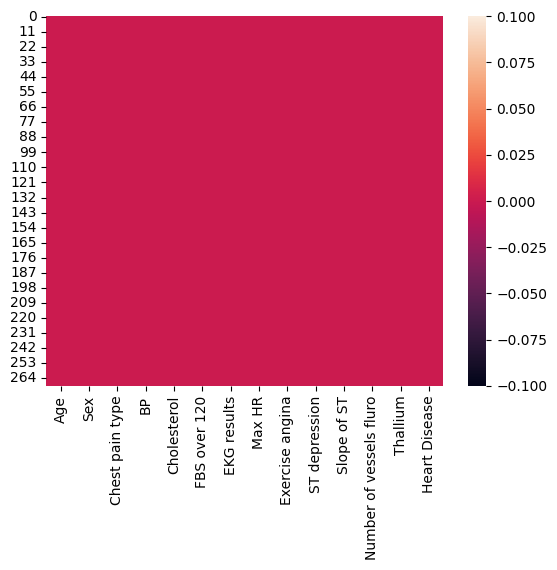

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
data_final[["Age","Sex","Chest pain type","BP","Cholesterol","FBS over 120","EKG results","Max HR","Slope of ST","Number of vessels fluro","Thallium","Heart Disease"]]=data_final[["Age","Sex","Chest pain type","BP","Cholesterol","FBS over 120","EKG results","Max HR","Slope of ST","Number of vessels fluro","Thallium","Heart Disease"]].replace(0,np.nan)
print(data_final)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70  1.0                4  130          322           NaN          2.0   
1     67  NaN                3  115          564           NaN          2.0   
2     57  1.0                2  124          261           NaN          NaN   
3     64  1.0                4  128          263           NaN          NaN   
4     74  NaN                2  120          269           NaN          2.0   
..   ...  ...              ...  ...          ...           ...          ...   
265   52  1.0                3  172          199           1.0          NaN   
266   44  1.0                2  120          263           NaN          NaN   
267   56  NaN                2  140          294           NaN          2.0   
268   57  1.0                4  140          192           NaN          NaN   
269   67  1.0                4  160          286           NaN          2.0   

     Max HR  Slope of ST  Number of vessels fluro  

<Axes: >

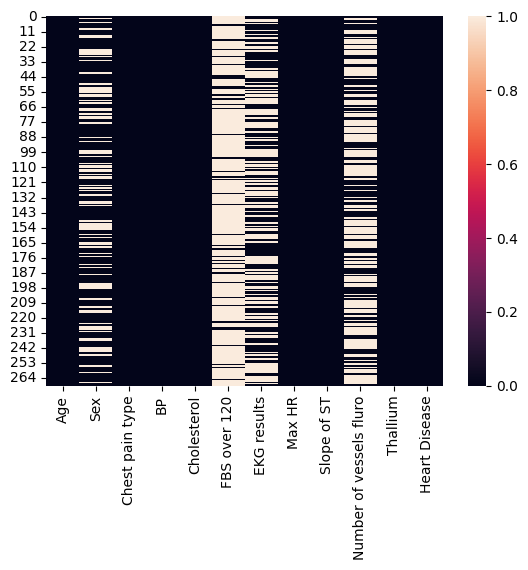

In [ ]:
sns.heatmap(data_final.isnull())

In [ ]:
data_final.fillna({'Age':data_final['Age'].mean()},inplace=True)
data_final.fillna({'Sex':data_final['Sex'].mean()},inplace=True)
data_final.fillna({'Chest pain type':data_final['Chest pain type'].mean()},inplace=True)
data_final.fillna({'Cholesterol':data_final['Cholesterol'].mean()},inplace=True)
data_final.fillna({'FBS over 120':data_final['FBS over 120'].mean()},inplace=True)
data_final.fillna({'EKG results':data_final['EKG results'].mean()},inplace=True)
data_final.fillna({'Max HR':data_final['Max HR'].mean()},inplace=True)
data_final.fillna({'Slope of ST':data_final['Slope of ST'].mean()},inplace=True)
data_final.fillna({'Number of vessels fluro':data_final['Number of vessels fluro'].mean()},inplace=True)
data_final.fillna({'Thallium':data_final['Thallium'].mean()},inplace=True)

<Axes: >

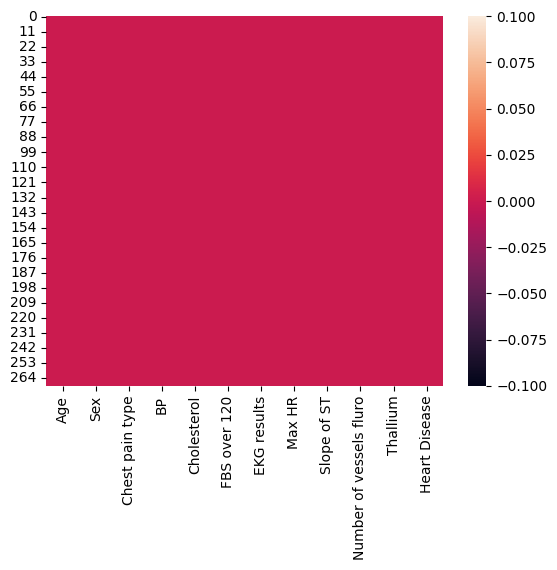

In [ ]:
sns.heatmap(data_final.isnull())

In [ ]:
print(data_final)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70  1.0                4  130          322           1.0     2.000000   
1     67  1.0                3  115          564           1.0     2.000000   
2     57  1.0                2  124          261           1.0     1.985612   
3     64  1.0                4  128          263           1.0     1.985612   
4     74  1.0                2  120          269           1.0     2.000000   
..   ...  ...              ...  ...          ...           ...          ...   
265   52  1.0                3  172          199           1.0     1.985612   
266   44  1.0                2  120          263           1.0     1.985612   
267   56  1.0                2  140          294           1.0     2.000000   
268   57  1.0                4  140          192           1.0     1.985612   
269   67  1.0                4  160          286           1.0     2.000000   

     Max HR  Slope of ST  Number of vessels fluro  

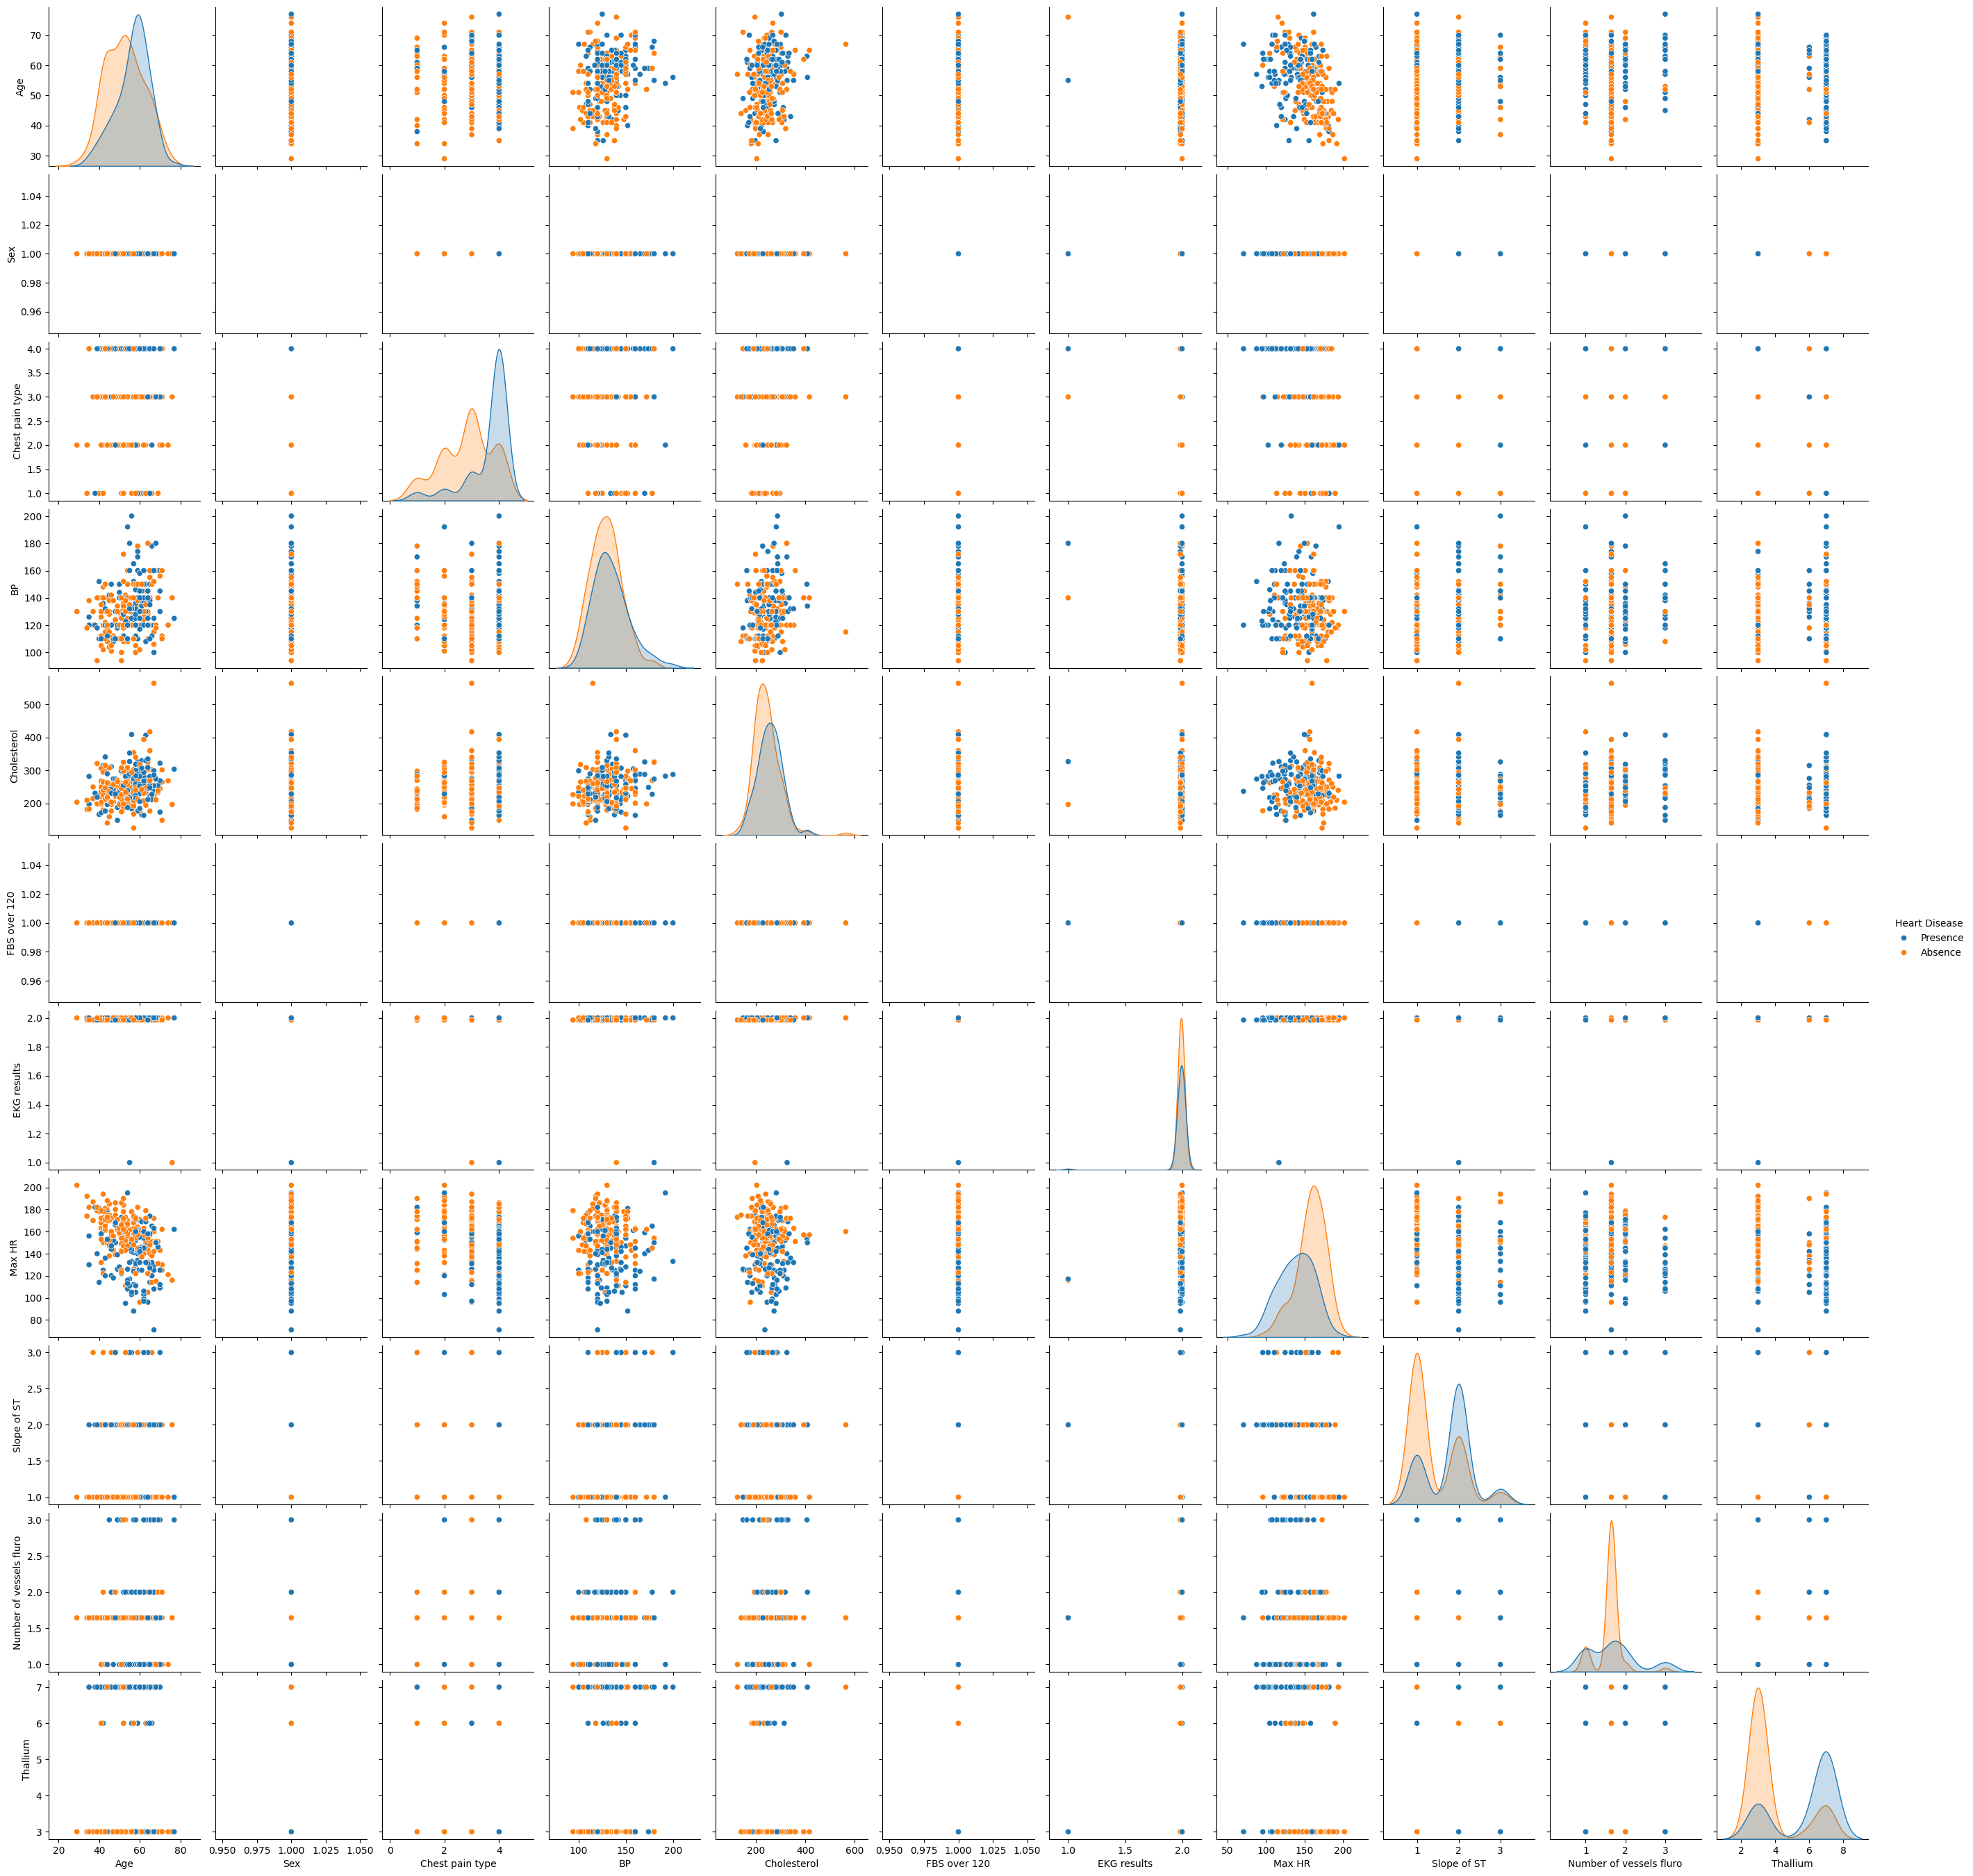

In [ ]:
sns.pairplot(data_final,hue='Heart Disease')

In [ ]:
x=data_final.iloc[:,:-1].values
y=data_final.iloc[:,-1].values

In [ ]:
print(data_final.shape)

(270, 12)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [ ]:
print(x_test.shape)

(54, 11)


In [ ]:
from sklearn.linear_model import LogisticRegression
logm=LogisticRegression(max_iter=2000)
logm.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [ ]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,logm.predict(x_test))
print(ac)

0.7592592592592593


<Axes: >

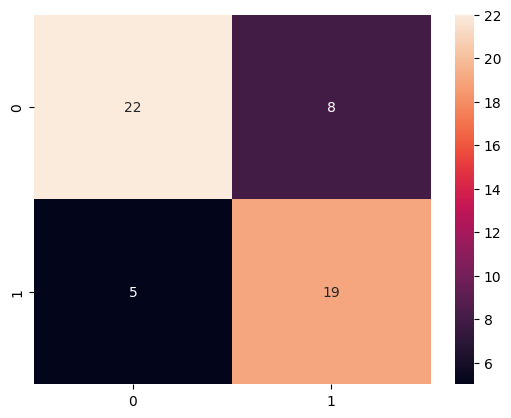

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
sns.heatmap(confusion_matrix(y_test,logm.predict(x_test)),annot=True)

In [ ]:
logm_cr=classification_report(y_test,logm.predict(x_test))
print(logm_cr)

              precision    recall  f1-score   support

     Absence       0.81      0.73      0.77        30
    Presence       0.70      0.79      0.75        24

    accuracy                           0.76        54
   macro avg       0.76      0.76      0.76        54
weighted avg       0.77      0.76      0.76        54



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
acknn=accuracy_score(y_test,knn.predict(x_test))
print(acknn)

0.6111111111111112


<Axes: >

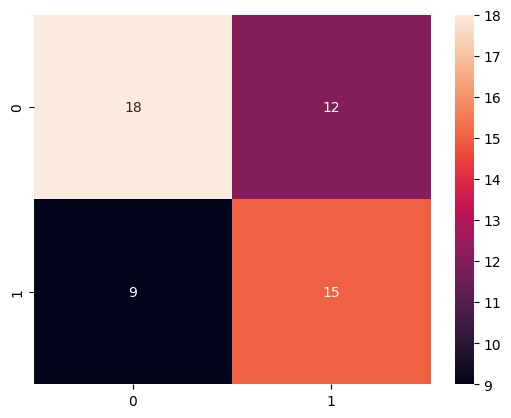

In [ ]:
sns.heatmap(confusion_matrix(y_test,knn.predict(x_test)),annot=True)

# ***GaussianNB***

In [ ]:
crknn=classification_report(y_test,knn.predict(x_test))
print(crknn)

              precision    recall  f1-score   support

     Absence       0.67      0.60      0.63        30
    Presence       0.56      0.62      0.59        24

    accuracy                           0.61        54
   macro avg       0.61      0.61      0.61        54
weighted avg       0.62      0.61      0.61        54



In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
acnb=accuracy_score(y_test,nb.predict(x_test))
print(acnb)

0.7777777777777778


<Axes: >

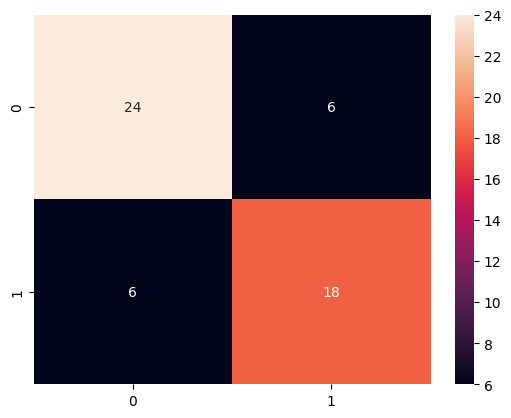

In [ ]:
sns.heatmap(confusion_matrix(y_test,nb.predict(x_test)),annot=True)

# ***SVC***

In [ ]:
crnb=classification_report(y_test,nb.predict(x_test))
print(crnb)

              precision    recall  f1-score   support

     Absence       0.80      0.80      0.80        30
    Presence       0.75      0.75      0.75        24

    accuracy                           0.78        54
   macro avg       0.78      0.78      0.78        54
weighted avg       0.78      0.78      0.78        54



**svm**

In [ ]:
from sklearn.svm import SVC
svmmodel=SVC(kernel="linear")
svmmodel.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
acsvm=accuracy_score(y_test,svmmodel.predict(x_test))
print(acsvm)

0.7592592592592593


<Axes: >

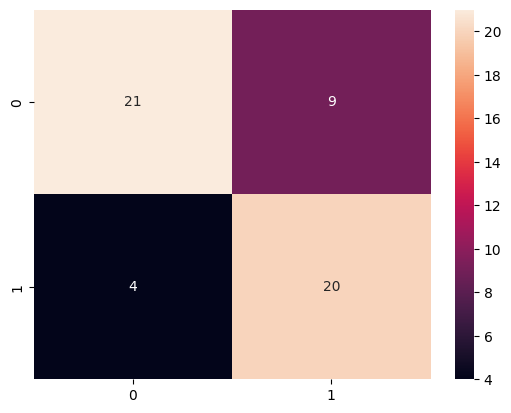

In [ ]:
sns.heatmap(confusion_matrix(y_test,svmmodel.predict(x_test)),annot=True)

# ***DecisionTree***

In [ ]:
crsvm=classification_report(y_test,svmmodel.predict(x_test))
print(crsvm)

              precision    recall  f1-score   support

     Absence       0.84      0.70      0.76        30
    Presence       0.69      0.83      0.75        24

    accuracy                           0.76        54
   macro avg       0.76      0.77      0.76        54
weighted avg       0.77      0.76      0.76        54



**dt**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtac=accuracy_score(y_test,dt.predict(x_test))
print(dtac)

0.7407407407407407


<Axes: >

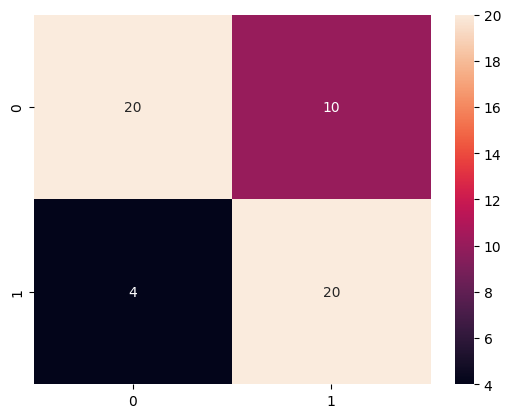

In [ ]:
sns.heatmap(confusion_matrix(y_test,dt.predict(x_test)),annot=True)

# ***RandomForest***

In [ ]:
dtcr=classification_report(y_test,dt.predict(x_test))
print(dtcr)

              precision    recall  f1-score   support

     Absence       0.83      0.67      0.74        30
    Presence       0.67      0.83      0.74        24

    accuracy                           0.74        54
   macro avg       0.75      0.75      0.74        54
weighted avg       0.76      0.74      0.74        54



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
acrf=accuracy_score(y_test,rf.predict(x_test))
print(acrf)

0.7407407407407407


<Axes: >

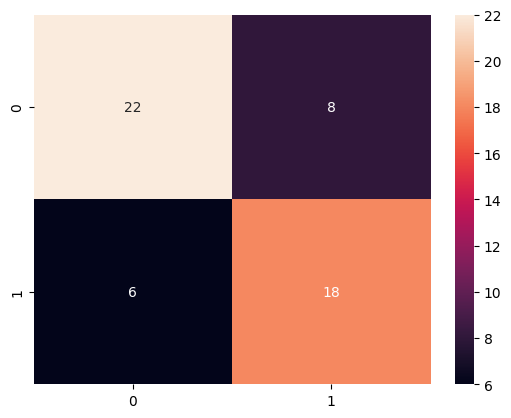

In [ ]:
sns.heatmap(confusion_matrix(y_test,rf.predict(x_test)),annot=True)

## ***k K-fold Cross-validation***


In [ ]:
crrf=classification_report(y_test,rf.predict(x_test))
print(crrf)

              precision    recall  f1-score   support

     Absence       0.79      0.73      0.76        30
    Presence       0.69      0.75      0.72        24

    accuracy                           0.74        54
   macro avg       0.74      0.74      0.74        54
weighted avg       0.74      0.74      0.74        54



**k fold**

In [ ]:
data_final=data.drop(["Exercise angina","ST depression"],axis=1)
print(data_final)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Slope of ST  Number of vessels fluro  

In [ ]:
x = data_final.iloc[:,:-1].values
y = data_final.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)


In [ ]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Naive Bayes": GaussianNB(),
    "SVM (Linear Kernel)": SVC(kernel="linear"),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}
print(StratifiedKFold)


<class 'sklearn.model_selection._split.StratifiedKFold'>


In [ ]:
for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')
    print(f"{name} - Mean Accuracy: {scores.mean():.4f}, Std Dev: {scores.std():.4f}")

Logistic Regression - Mean Accuracy: 0.8407, Std Dev: 0.0343
KNN - Mean Accuracy: 0.6370, Std Dev: 0.0919
Naive Bayes - Mean Accuracy: 0.8074, Std Dev: 0.0363
SVM (Linear Kernel) - Mean Accuracy: 0.8481, Std Dev: 0.0412
Decision Tree - Mean Accuracy: 0.7222, Std Dev: 0.0497
Random Forest - Mean Accuracy: 0.8000, Std Dev: 0.0395


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print("Test set shape:", x_test.shape)

Test set shape: (54, 11)


In [ ]:
def evaluate_model(model, name):
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds)
    print(f"\n{name} Accuracy: {acc:.4f}")
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    print(classification_report(y_test, preds))


Logistic Regression Accuracy: 0.8519


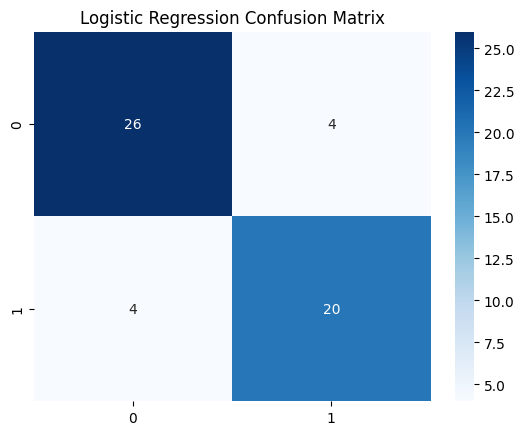

              precision    recall  f1-score   support

     Absence       0.87      0.87      0.87        30
    Presence       0.83      0.83      0.83        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54


KNN Accuracy: 0.6296


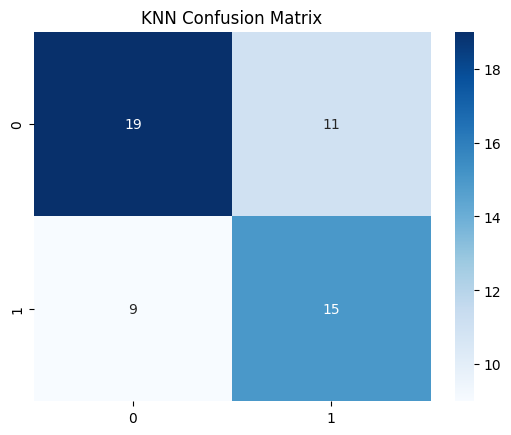

              precision    recall  f1-score   support

     Absence       0.68      0.63      0.66        30
    Presence       0.58      0.62      0.60        24

    accuracy                           0.63        54
   macro avg       0.63      0.63      0.63        54
weighted avg       0.63      0.63      0.63        54


Naive Bayes Accuracy: 0.7593


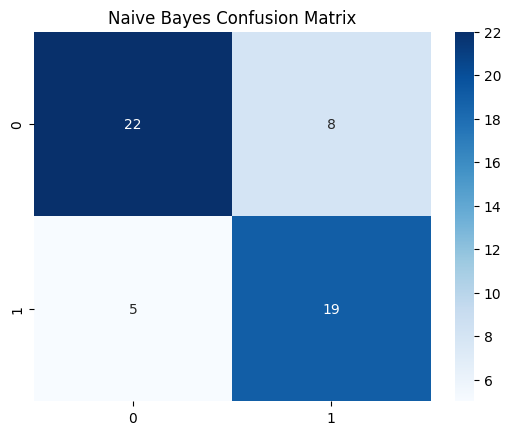

              precision    recall  f1-score   support

     Absence       0.81      0.73      0.77        30
    Presence       0.70      0.79      0.75        24

    accuracy                           0.76        54
   macro avg       0.76      0.76      0.76        54
weighted avg       0.77      0.76      0.76        54


SVM Accuracy: 0.8148


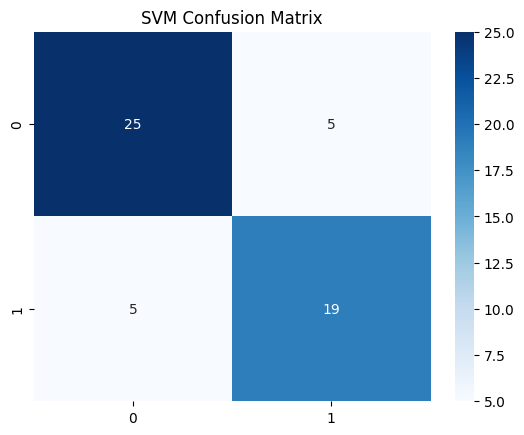

              precision    recall  f1-score   support

     Absence       0.83      0.83      0.83        30
    Presence       0.79      0.79      0.79        24

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.81      0.81      0.81        54


Decision Tree Accuracy: 0.7407


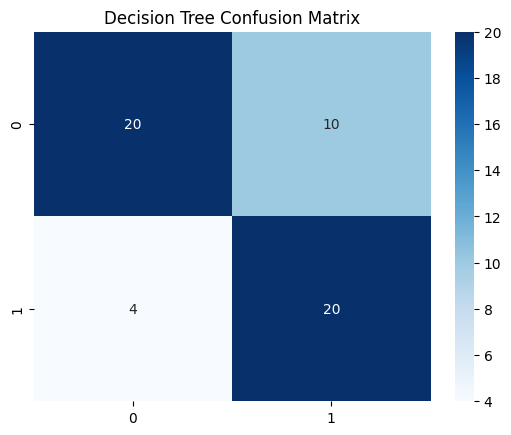

              precision    recall  f1-score   support

     Absence       0.83      0.67      0.74        30
    Presence       0.67      0.83      0.74        24

    accuracy                           0.74        54
   macro avg       0.75      0.75      0.74        54
weighted avg       0.76      0.74      0.74        54


Random Forest Accuracy: 0.7593


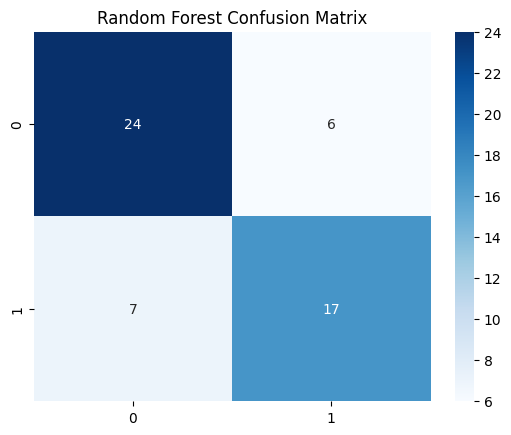

              precision    recall  f1-score   support

     Absence       0.77      0.80      0.79        30
    Presence       0.74      0.71      0.72        24

    accuracy                           0.76        54
   macro avg       0.76      0.75      0.76        54
weighted avg       0.76      0.76      0.76        54



In [ ]:
evaluate_model(models["Logistic Regression"], "Logistic Regression")
evaluate_model(models["KNN"], "KNN")
evaluate_model(models["Naive Bayes"], "Naive Bayes")
evaluate_model(models["SVM (Linear Kernel)"], "SVM")
evaluate_model(models["Decision Tree"], "Decision Tree")
evaluate_model(models["Random Forest"], "Random Forest")